In [1]:
import re
import matplotlib.pyplot as plt
from pymatgen.core.physical_constants import c,h,e
from math import sqrt,pi
import re
import numpy as np

def parse_absorption(filename):
    omega = []
    epsilon2 = []
    epsilon1 =  []
    jdos = []
    with open(filename,'r') as f:
        for line in f:
            if line.split()[0]!='#':
                omega.append(float(line.split()[0]))
                epsilon2.append(float(line.split()[1]))
                epsilon1.append(float(line.split()[2]))
                jdos.append(float(line.split()[3])) ####exagerated
    return omega,epsilon2,epsilon1,jdos

def calculate_absorption(filename):
    omega,epsilon2,epsilon1,jdos = parse_absorption(filename)
    constant = 4*pi*e/(h*c)*0.01
    nedos = len(omega)
    norm = np.zeros(nedos)
    k = np.zeros(nedos)
    absorption = np.zeros(nedos)
    for i in range(nedos):
        norm[i] = sqrt(epsilon2[i]**2+epsilon1[i]**2)
        k[i] = sqrt(2)/2*sqrt(norm[i]-epsilon1[i])
        absorption[i] = omega[i]*k[i]*constant
    return absorption
    


In [2]:
#directory = '/Users/yao/Google Drive/data/BGW-test/CsSnI3/'
directory = '/Users/yao/Google Drive/data/BGW-test/Cs2SnI6/convergence/K_fine/'
omega_eh,epsilon2_eh,epsilon1_eh,jdos_eh = parse_absorption(directory+'absorption_eh.16')
omega_noeh,epsilon2_noeh,epsilon1_noeh,jdos_noeh = parse_absorption(directory+'absorption_noeh.16')
absorption_eh = calculate_absorption(directory+'absorption_eh.16')
absorption_noeh = calculate_absorption(directory+'absorption_noeh.16')

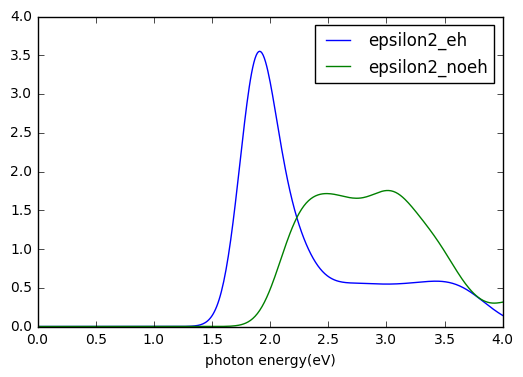

In [15]:
plt.plot(omega_eh,epsilon2_eh,'-',label='epsilon2_eh')
plt.plot(omega_noeh,epsilon2_noeh, '-',label='epsilon2_noeh')
plt.xlim([0,4])
plt.ylim([0,4])
plt.xlabel('photon energy(eV)')
plt.legend(loc='best')
plt.savefig(directory+'epsilon2.eps')
plt.show()

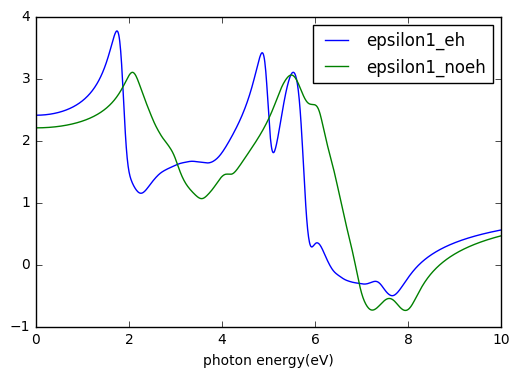

In [12]:
plt.plot(omega_eh,epsilon1_eh,'-',label='epsilon1_eh')
plt.plot(omega_noeh,epsilon1_noeh, '-',label='epsilon1_noeh')
plt.xlim([0,10])
plt.legend()
plt.xlabel('photon energy(eV)')
plt.show()

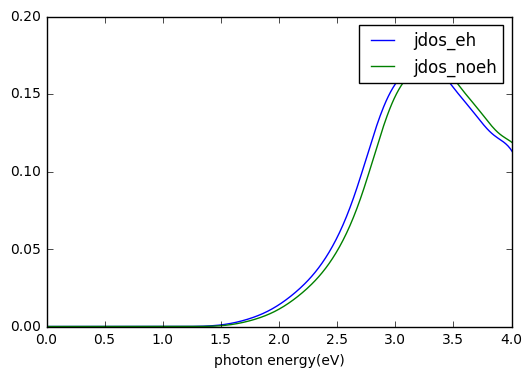

In [11]:
plt.plot(omega_eh,jdos_eh,'-',label='jdos_eh')
plt.plot(omega_noeh,jdos_noeh, '-',label='jdos_noeh')
plt.xlim([0,4])
plt.ylim([0,0.2])
plt.xlabel('photon energy(eV)')
#plt.ylim([0,0.00001])
plt.legend()
plt.show()

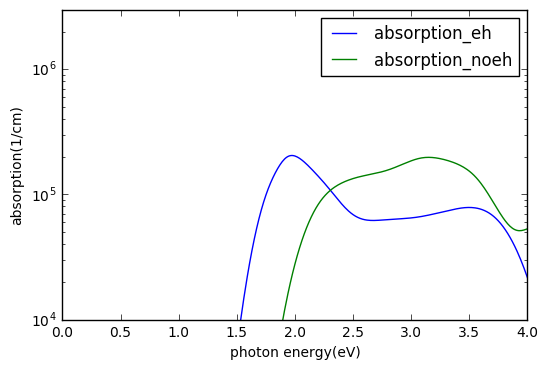

In [8]:
plt.semilogy(omega_eh, absorption_eh, label='absorption_eh')
plt.semilogy(omega_noeh, absorption_noeh, label='absorption_noeh')
plt.legend(loc = 'best')
plt.ylim([1e4,3e6])
plt.xlim([0,4])
plt.xlabel('photon energy(eV)')
plt.ylabel('absorption(1/cm)')
plt.savefig(directory+'absorption.eps')
plt.show()